## SPLIT THE DATA 

- Data used in this exercize are the cancer_data.csv. Information about this dataset can be found at Breast Cancer Wisconsin (Diagnostic) Data Set, https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
- Use Feature Selection and give your conclusion about what features are important to the target (cancer diagnosis)!
- Split the data with 85% data train and 15% data test composisiton!

First we import all the libraries necessary, read the dataset and put it into a new dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
df_cancer = pd.read_csv('cancer_data.csv')

In [3]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


After all the libraries and the datasets are loaded, we need to see the overview of the data. For example to check for the NaN Values in this data.

In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df_cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Interestingly, there are 569 NaN values located in one column called 'Unnamed: 32'. Which I think it's unnecesarry. Therefore I think I'll drop all this columns at once.

In [6]:
df_cancer = df_cancer.drop(['Unnamed: 32'], axis=1)

In [7]:
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


From this point below, we start to determine the target columns and check for all the variables that might important to the target and rank them into 10 best features using Feature Selection method.

In [8]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
X = df_cancer.iloc[:,2:32]
y = df_cancer.iloc[:,1]

In [10]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
print(featureScores.nlargest(10,'Score'))

            Feature          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


Univariate Selection successfully gave us the top 10 best features. But just in case, we might need see to another method as a comparison.

[0.05505901 0.0195418  0.06915402 0.04325314 0.00944916 0.02821745
 0.05451249 0.08583796 0.00796952 0.0069414  0.02802237 0.00625881
 0.01444127 0.03287171 0.00579626 0.00786989 0.01006043 0.0066412
 0.00575011 0.00579614 0.10085697 0.02036796 0.08894234 0.10081987
 0.02406659 0.0179973  0.04310238 0.07319242 0.01782234 0.00938772]


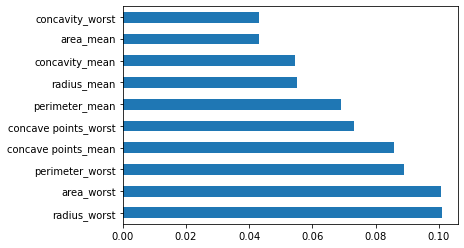

In [11]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

Feature Importance method also gave us a more or less the same result in the variables. Then we'll move to the last method available to seek out the best features.

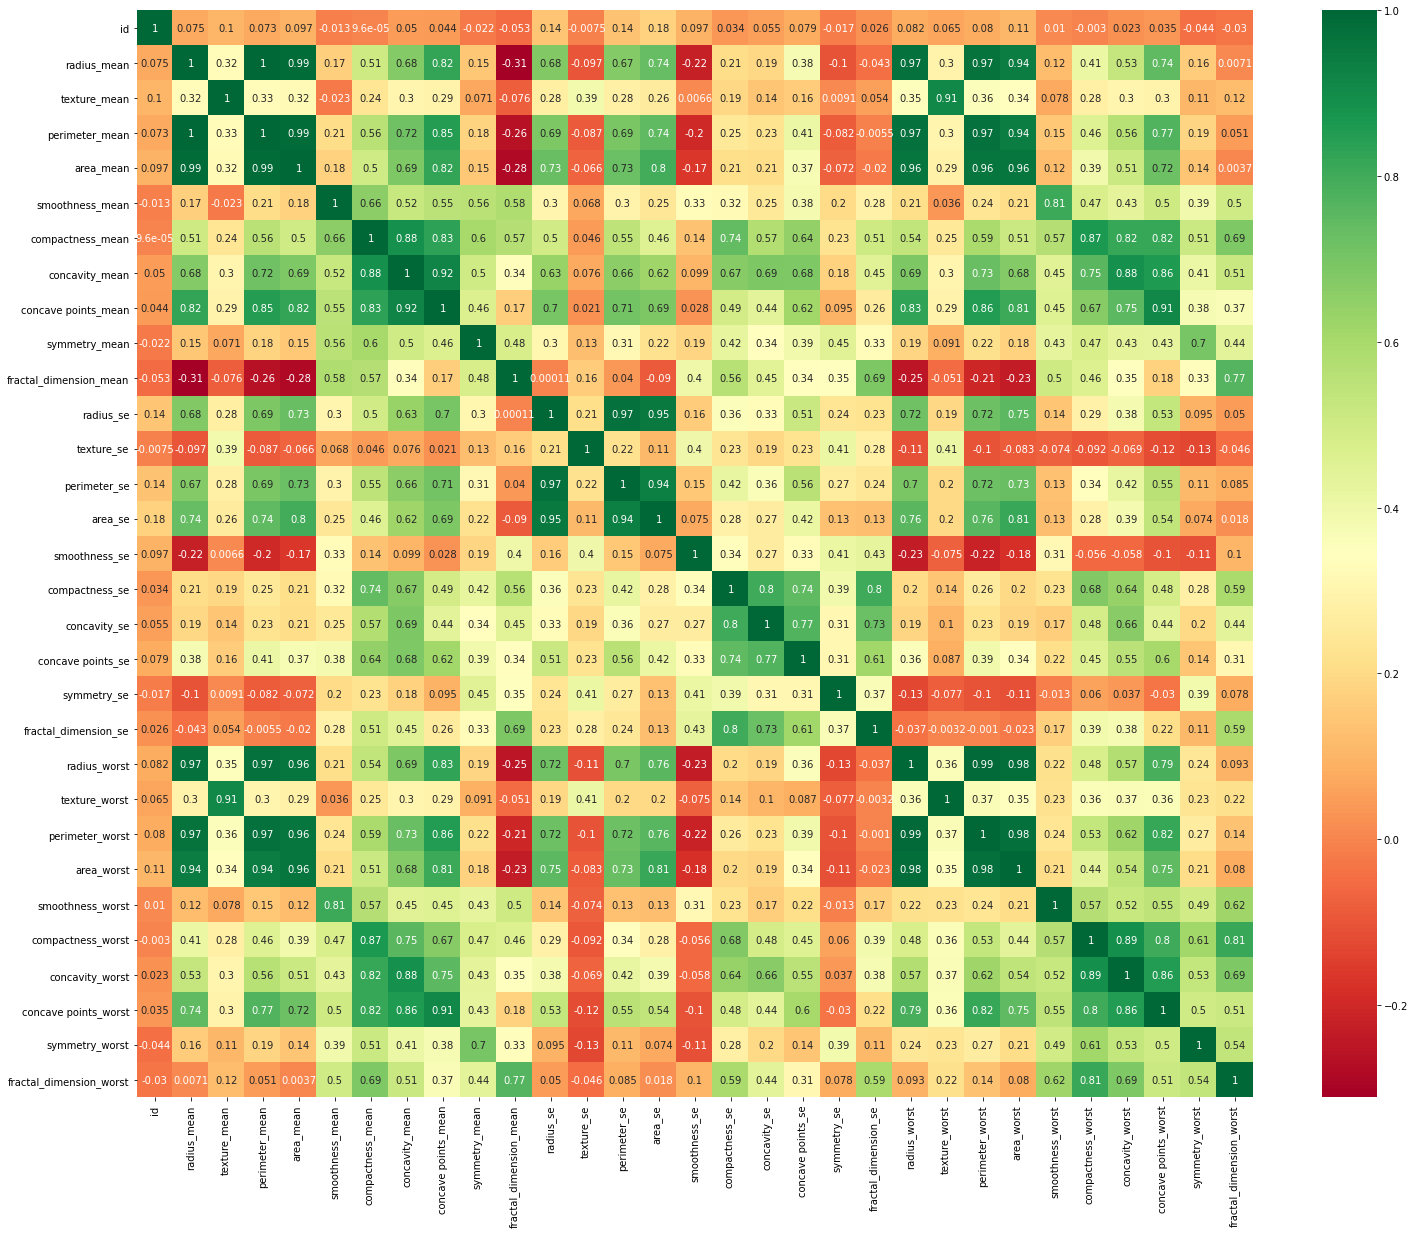

In [24]:
corrmat = df_cancer.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,20))

sns.heatmap(df_cancer[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The heatmap above, used to see the best variable correlated to the target (diagnosis). We can see the greener one means that the variables are better correlated. 

Now, after seeing the three method above, I choose the second method to pick the best features for the diagnosis variable, as this method are used more than the other two method out there. Then we start to insert the features selected by previous method into a new dataframe to begin the splitting process. 

In [12]:
df_new = df_cancer[['diagnosis', 'perimeter_mean', 'concavity_mean', 'concavity_worst', 'radius_mean', 
                    'area_mean', 'area_worst', 'concave points_mean', 'radius_worst', 'concave points_worst', 'perimeter_worst']]

In [13]:
df_new.head()

,diagnosis,perimeter_mean,concavity_mean,concavity_worst,radius_mean,area_mean,area_worst,concave points_mean,radius_worst,concave points_worst,perimeter_worst
0,M,122.80,0.3001,0.7119,17.99,1001.0,2019.0,0.14710,25.38,0.2654,184.60
1,M,132.90,0.0869,0.2416,20.57,1326.0,1956.0,0.07017,24.99,0.1860,158.80
2,M,130.00,0.1974,0.4504,19.69,1203.0,1709.0,0.12790,23.57,0.2430,152.50
3,M,77.58,0.2414,0.6869,11.42,386.1,567.7,0.10520,14.91,0.2575,98.87
4,M,135.10,0.1980,0.4000,20.29,1297.0,1575.0,0.10430,22.54,0.1625,152.20


Below, I started to split the data into 85% for train and 15% test data as instructed, and thus finished the process of splitting the data. 

In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(df_new[['perimeter_mean', 'concavity_mean', 'concavity_worst', 'radius_mean', 
                                                        'area_mean', 'area_worst', 'concave points_mean', 'radius_worst', 
                                                        'concave points_worst', 'perimeter_worst']], 
                                                df_new['diagnosis'],train_size = 0.85)

In [15]:
xTrain

,perimeter_mean,concavity_mean,concavity_worst,radius_mean,area_mean,area_worst,concave points_mean,radius_worst,concave points_worst,perimeter_worst
185,63.76,0.001597,0.00692,10.08,317.5,437.0,0.002404,11.87,0.01042,75.39
487,128.10,0.225600,0.59360,19.44,1167.0,1740.0,0.119400,23.96,0.20600,153.90
75,104.10,0.097690,0.28290,16.07,817.7,1223.0,0.066380,19.77,0.15200,128.80
135,81.72,0.047110,0.21770,12.77,506.3,653.6,0.027040,14.49,0.09331,92.04
315,79.19,0.004473,0.01938,12.49,481.6,544.2,0.006423,13.34,0.02784,84.48
...,...,...,...,...,...,...,...,...,...,...
137,73.06,0.035030,0.13990,11.43,399.8,462.0,0.028750,12.32,0.08476,79.93
233,134.40,0.155400,0.41460,20.51,1319.0,1872.0,0.083400,24.47,0.15630,162.70
478,73.99,0.053080,0.25960,11.49,404.9,467.6,0.019690,12.40,0.07431,82.04
39,88.40,0.106300,0.50300,13.48,559.2,740.4,0.054390,15.53,0.22580,107.30


In [16]:
yTrain

185    B
487    M
75     M
135    M
315    B
      ..
137    B
233    M
478    B
39     M
404    B
Name: diagnosis, Length: 483, dtype: object

In [17]:
xTest

,perimeter_mean,concavity_mean,concavity_worst,radius_mean,area_mean,area_worst,concave points_mean,radius_worst,concave points_worst,perimeter_worst
51,87.21,0.018570,0.10500,13.640,571.8,656.7,0.017230,14.67,0.08586,96.08
387,88.37,0.020450,0.10910,13.880,596.6,745.3,0.008507,15.51,0.04537,99.66
424,61.93,0.008934,0.02085,9.742,289.7,380.9,0.019670,11.21,0.04589,71.79
390,65.75,0.019230,0.08615,10.260,321.6,394.5,0.019680,11.38,0.06696,73.23
241,78.61,0.010530,0.06243,12.420,476.5,543.4,0.011080,13.20,0.04052,83.85
...,...,...,...,...,...,...,...,...,...,...
494,84.06,0.018000,0.07698,13.160,538.7,648.3,0.012560,14.50,0.04195,95.29
210,134.70,0.164000,0.38610,20.580,1290.0,1656.0,0.095610,23.24,0.19200,158.30
222,65.12,0.017680,0.06572,10.180,313.1,375.6,0.019150,11.17,0.05575,71.94
510,76.31,0.067260,0.26900,11.740,426.0,473.8,0.026390,12.45,0.10560,81.25


In [18]:
yTest

51     B
387    B
424    B
390    B
241    B
      ..
494    B
210    M
222    B
510    B
535    M
Name: diagnosis, Length: 86, dtype: object